# Heart Disease Prediction Project

The context of this capstone is as follows: This capstone project involves exploring the Cleveland Heart Disease Database, which contains 76 attributes, with only a subset of 14 attributes commonly used in experiments. The goal is to predict the presence of heart disease based on these attributes. However, the dataset has undergone anonymization, with patient names and social security numbers replaced by dummy values. The task for the capstone would be to explore feature selection techniques and machine learning algorithms to optimize prediction accuracy while reducing the dimensionality of the dataset. Additionally, understanding the ethical implications of data anonymization and ensuring compliance with privacy regulations would be crucial aspects of the project.


##### My problem statement is: How can we optimize the prediction accuracy of heart disease presence using machine learning algorithms?

Here are the first steps to the completion of this capstone.

### Data Cleaning

My first step is importing libraries and loading data.

In [1]:
import pandas as pd
import numpy as np

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
heart_data = pd.read_csv('processed.cleveland.data', names=column_names, na_values='?')


Now I look at the dataset and look to see what/where the missing values are.

In [3]:
print("Original Dataset:")
print(heart_data.head())

# Check for missing values
missing_values = heart_data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Original Dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


Now I handle those that are missing values and fill them in.

In [4]:
# Fill missing values in 'ca' and 'thal'
heart_data['ca'].fillna(heart_data['ca'].median(), inplace=True)
heart_data['thal'].fillna(heart_data['thal'].median(), inplace=True)

# Check for missing values after handling
missing_values_after = heart_data.isnull().sum()
print("\nMissing Values After Handling:")
print(missing_values_after)



Missing Values After Handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


Now that the missing values are properly handled I save the new file for future usage.

In [5]:
# Define the file path for saving the cleaned dataset
cleaned_data_file = "cleaned_heart_disease_data.csv"

# Save the cleaned dataset to a new CSV file
heart_data.to_csv(cleaned_data_file, index=False)

print(f"Cleaned dataset saved to {cleaned_data_file}")

Cleaned dataset saved to cleaned_heart_disease_data.csv


## EDA

The next step is the EDA (Exploratory Data Analysis). I upload the necessary libraries and reload my data as "heart_data" for easier understanding and look at the summary statistics.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

heart_data = pd.read_csv('cleaned_heart_disease_data.csv')

print("Summary Statistics:")
print(heart_data.describe())


Summary Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.663366   
std    

Now I will use different visualization tools to better see the data.

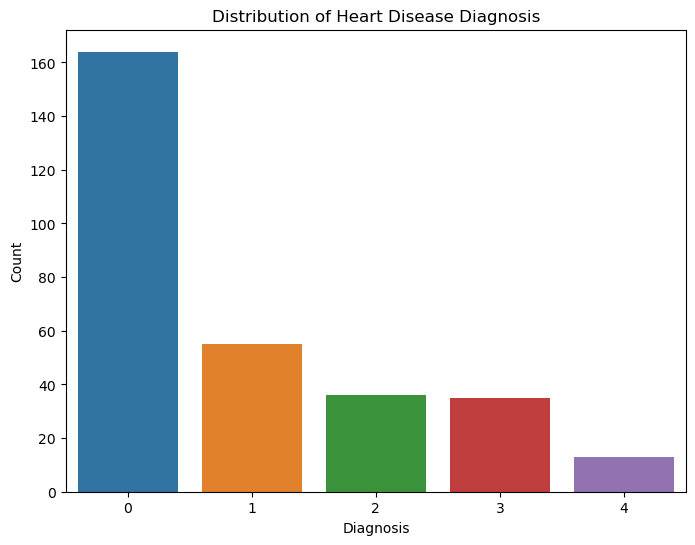

In [7]:
#Visualizes the distribution of the target variable 'num' (diagnosis of heart disease) using a count plot.
plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=heart_data)
plt.title('Distribution of Heart Disease Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

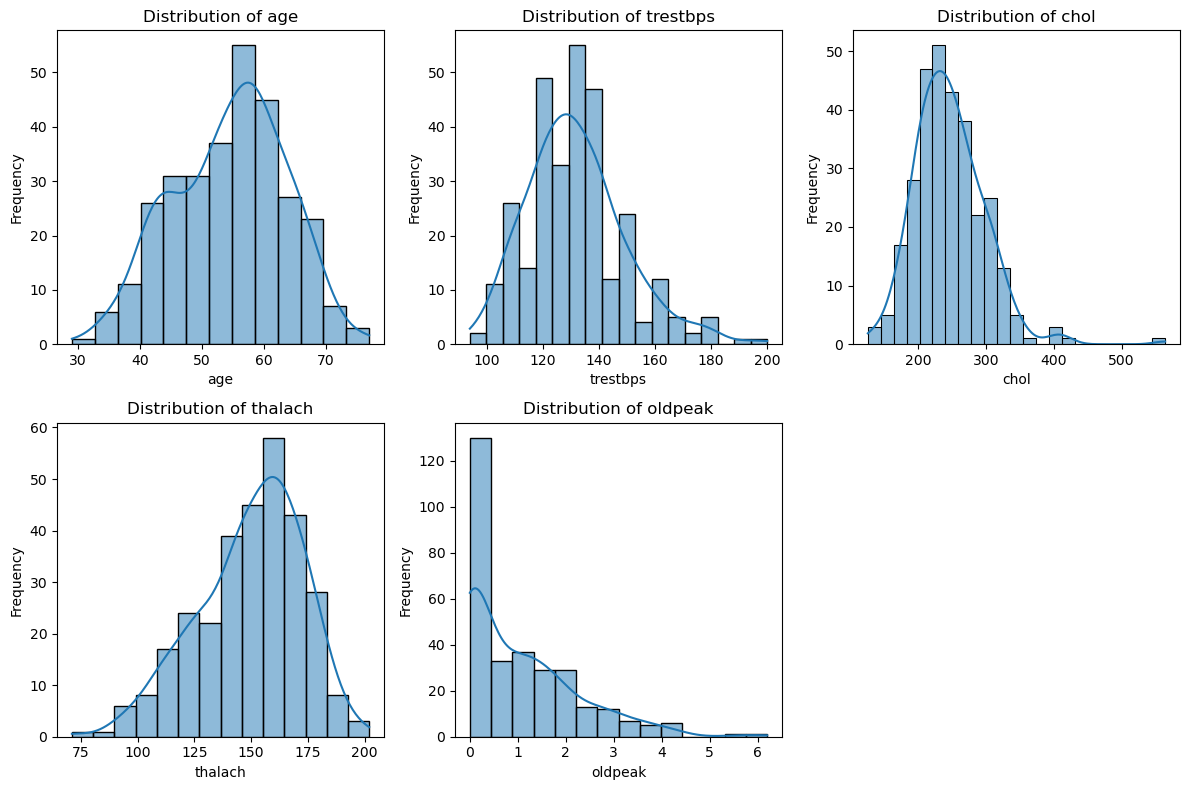

In [12]:
#Plots histograms to visualize the distribution of numerical variables.
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(heart_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

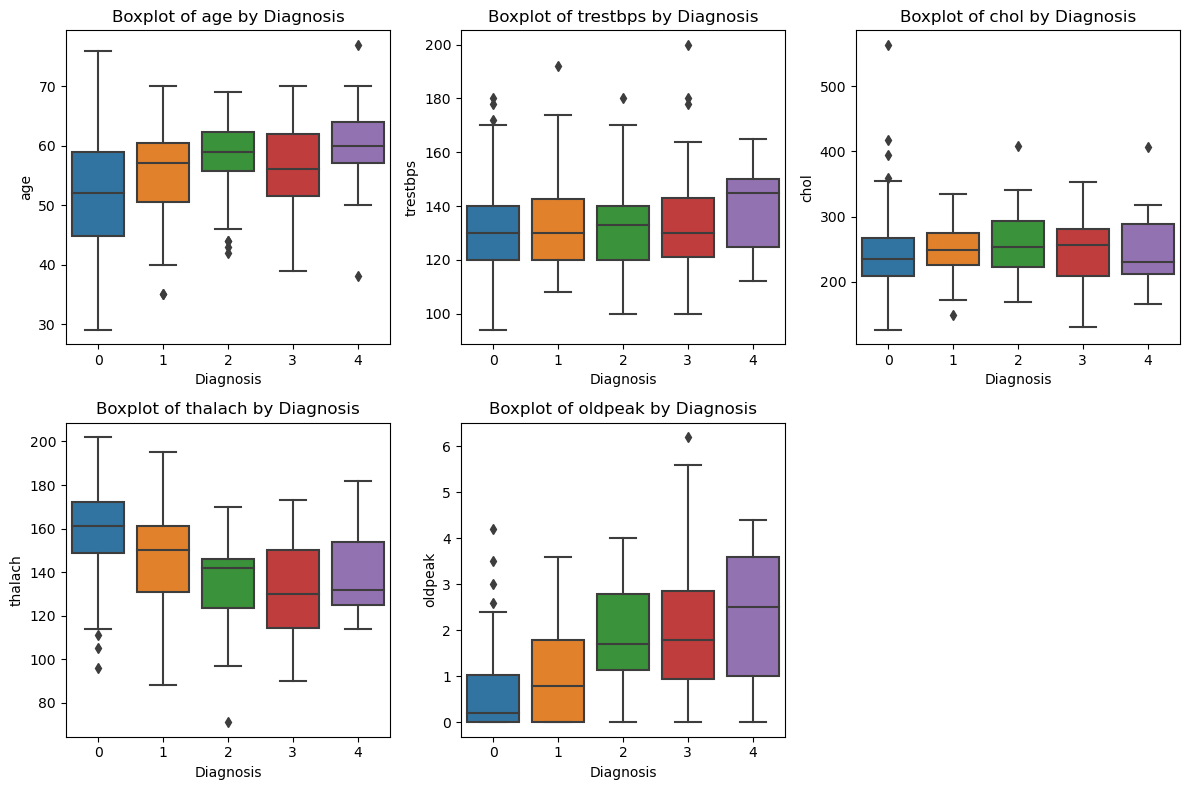

In [10]:
#Box plots to visualize the relationship between numerical variables and heart disease diagnosis.
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='num', y=feature, data=heart_data)
    plt.title(f'Boxplot of {feature} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


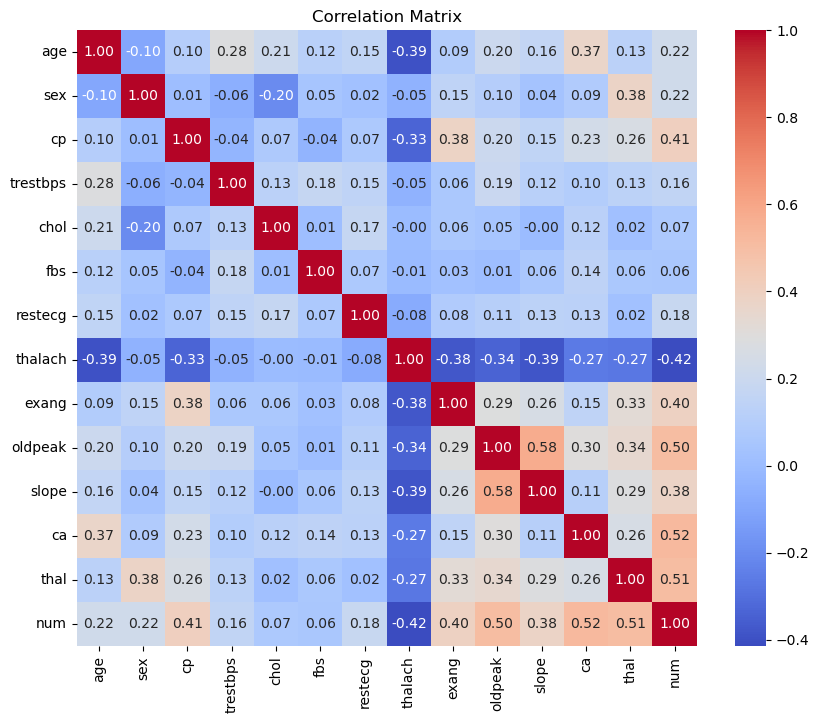

In [11]:
#Correlation matrix between numerical variables and visualizes it using a heatmap
correlation_matrix = heart_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Now that the data wrangling and the EDA have been done I can now move on the next step.